# Goal

* Compare prevalence & abundance

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map/'

# phyloseq
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq//physeq_IndD.RDS'

# host cladogram
clado_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/cladogram//unified_metadata_20171206_r5k_SpecD-rn.nwk'

# misc
sparsity_cutoff = 0.05

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
make_dir(work_dir)
setwd(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map/ 


# Load

In [4]:
physeq = readRDS(physeq_file)
physeq

Loading required package: phyloseq
Warning message:
“replacing previous import ‘stats::sd’ by ‘BiocGenerics::sd’ when loading ‘S4Vectors’”Warning message:
“replacing previous import ‘stats::var’ by ‘BiocGenerics::var’ when loading ‘S4Vectors’”Warning message:
“multiple methods tables found for ‘var’”Warning message:
“multiple methods tables found for ‘sd’”Warning message:
“multiple methods tables found for ‘rowSums’”Warning message:
“multiple methods tables found for ‘colSums’”Warning message:
“multiple methods tables found for ‘rowMeans’”Warning message:
“multiple methods tables found for ‘colMeans’”Warning message:
“replacing previous import ‘BiocGenerics::rowSums’ by ‘S4Vectors::rowSums’ when loading ‘Biostrings’”Warning message:
“replacing previous import ‘BiocGenerics::var’ by ‘S4Vectors::var’ when loading ‘Biostrings’”Warning message:
“replacing previous import ‘BiocGenerics::rowMeans’ by ‘S4Vectors::rowMeans’ when loading ‘Biostrings’”Warning message:
“replacing previous import 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 31209 taxa and 221 samples ]
sample_data() Sample Data:       [ 221 samples by 100 sample variables ]
tax_table()   Taxonomy Table:    [ 31209 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 31209 tips and 30658 internal nodes ]

# Prevalence ~ Abundance

In [7]:
otu = physeq %>%
    otu_table %>%
    as.matrix %>% as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    gather(SampleID, Abundance, -OTU)
otu %>% status

[1] 6897189       3


OTU,SampleID,Abundance
ea2df9bcd7f6a10e0fa509d237d19c6d,X1.Eurasian.Beaver,0
f0adce016b4c9bba1532f6f1682d4d64,X1.Eurasian.Beaver,0
b9b9562a0f34ad60c552f7f46d7a4b3b,X1.Eurasian.Beaver,0


In [8]:
# summariziing
otu = otu %>%
    group_by(OTU) %>%
    summarize(Prevalance = sum(Abundance > 0),
              Abundance = mean(Abundance)) %>%
    ungroup()

otu %>% status

[1] 31209     3


OTU,Prevalance,Abundance
0001fc475a4ad532d85da4d26068f1ec,4,0.072398190
000288a359abcc5cfb8982766cfd635a,1,0.004524887
0003924139f23b61d50e68466e863de4,1,0.212669683


In [25]:
otu$Abundance %>% summary %>% print
otu$Prevalance %>% summary %>% print

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00453  0.00905  0.02262  0.16020  0.06335 98.51000 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.813   2.000  78.000 


`geom_smooth()` using method = 'gam'


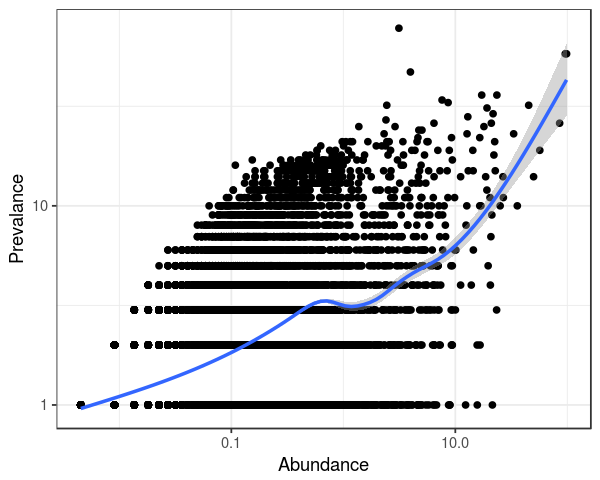

In [23]:
# plotting
p = ggplot(otu, aes(Abundance, Prevalance)) +
    geom_point() +
    geom_smooth() +
    scale_x_log10() +
    scale_y_log10() +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=4)
plot(p)

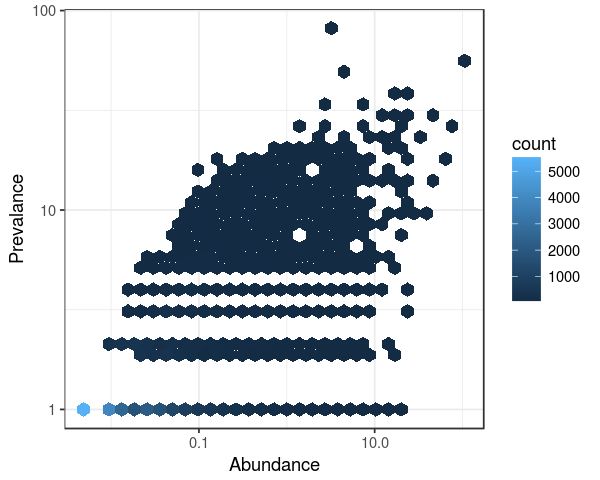

In [22]:
# plotting
p = ggplot(otu, aes(Abundance, Prevalance)) +
    geom_hex() +
    scale_x_log10() +
    scale_y_log10() +
    theme_bw()

options(repr.plot.width=5, repr.plot.height=4)
plot(p)